## Global To Dos:
* read paper
* [steps document](https://docs.google.com/document/d/1du2fcmVzTqnW0FWGmUxvpR2t6QEfwxDIrHSZs9k3HZM/edit?usp=sharing)

Section 1: Load and Preprocess Data

In [21]:
import utils_preprocessing as up
import importlib
importlib.reload(up)
from itertools import groupby
import yaml
import os
import textdistance
import pandas as pd
pd.options.mode.chained_assignment = None

Read in YAML and make PATH

In [2]:
with open("config.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)

PATH = os.path.join(cfg['data']['Directory'] + ":" + os.sep, cfg['data']['Folder1'], cfg['data']['Folder2'], cfg['data']['Folder3']) # Alix Path

#PATH = 'SOTU/'
#PATH = '/Users/aleistermontfort/Desktop/speeches' # Aleister Path
filetype = '*txt'

C:\Users\Alix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


Read in Data

In [3]:
speeches = up.reading_data(PATH,'*.txt')

Create Noun Phrases

In [4]:
new_speeches = up.chunks(speeches)

Clean Words

In [5]:
clean_speeches = up.clean_words(new_speeches)

Lemmatize Words

In [6]:
words_changed = up.word_changes(clean_speeches, 0.5, 100)

In [7]:
phrases_lemmed = up.lemmed_phrases(words_changed, clean_speeches)

Counting Occurrence of Terms

In [8]:
counted_words = up.count_words(phrases_lemmed)

Limit List to Top 1000

In [9]:
top_words = up.top_x(counted_words, 1000)

limit paragraph phrases only to those in top 1000

In [11]:
limited_paragraphs = up.limit(clean_speeches, top_words)

In [22]:
tfidfs = up.corpus_tfidf(limited_paragraphs, counted_words, top_words)

In [23]:
periods = up.periodization(tfidfs)

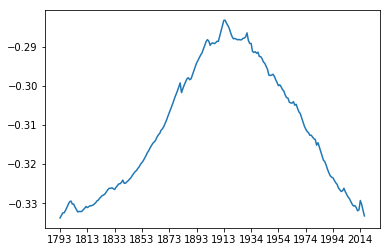

In [24]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

lists = sorted(periods.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

plt.plot(x, y)
plt.show()

In [25]:
sorted(lists, key=lambda x: x[1])

[('1793', -0.333734730547787),
 ('2017', -0.3332256698592469),
 ('1794', -0.3330908672523931),
 ('1795', -0.33245574912156556),
 ('1796', -0.3324293134724483),
 ('1806', -0.3322116442499402),
 ('1808', -0.33212237759450536),
 ('1807', -0.3320784152237905),
 ('1809', -0.3320561853295985),
 ('2012', -0.33191131989059514),
 ('2016', -0.3318258134091256),
 ('1797', -0.33181860453573747),
 ('2013', -0.33169989092715535),
 ('1810', -0.33163207175981846),
 ('1805', -0.33160612512736976),
 ('1811', -0.33129494830542916),
 ('1813', -0.33109668701095774),
 ('2011', -0.3310873360958457),
 ('1798', -0.3310393008539828),
 ('1804', -0.33098659805542996),
 ('1814', -0.3308566018246567),
 ('1812', -0.3308199328420453),
 ('2009', -0.33069245437559247),
 ('1815', -0.33063775774899773),
 ('1816', -0.33061728547213226),
 ('2010', -0.3305765716992727),
 ('1817', -0.3304890207936141),
 ('1799', -0.3303054072363184),
 ('2015', -0.33028274314243106),
 ('1818', -0.3302297784126855),
 ('1803', -0.33021729511886